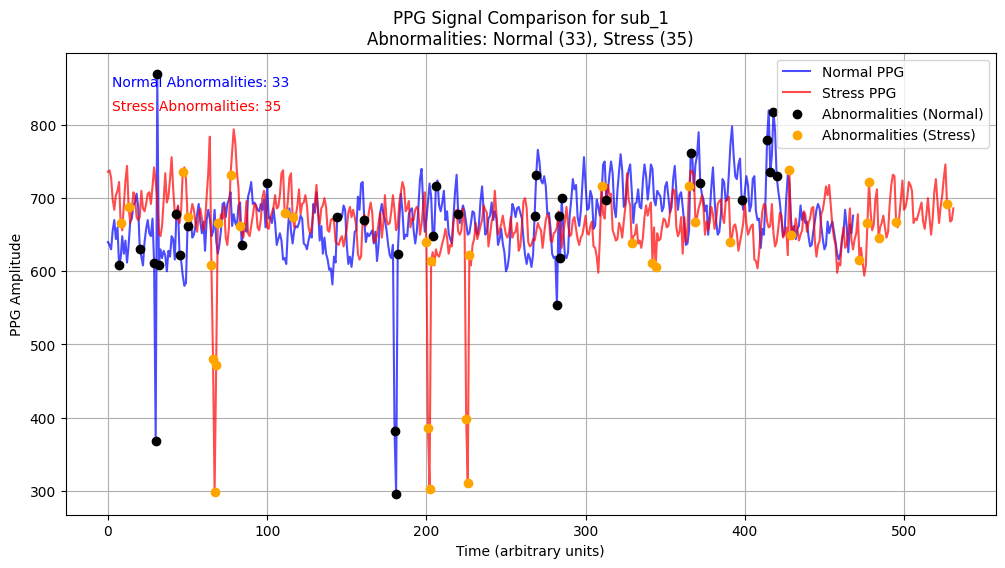

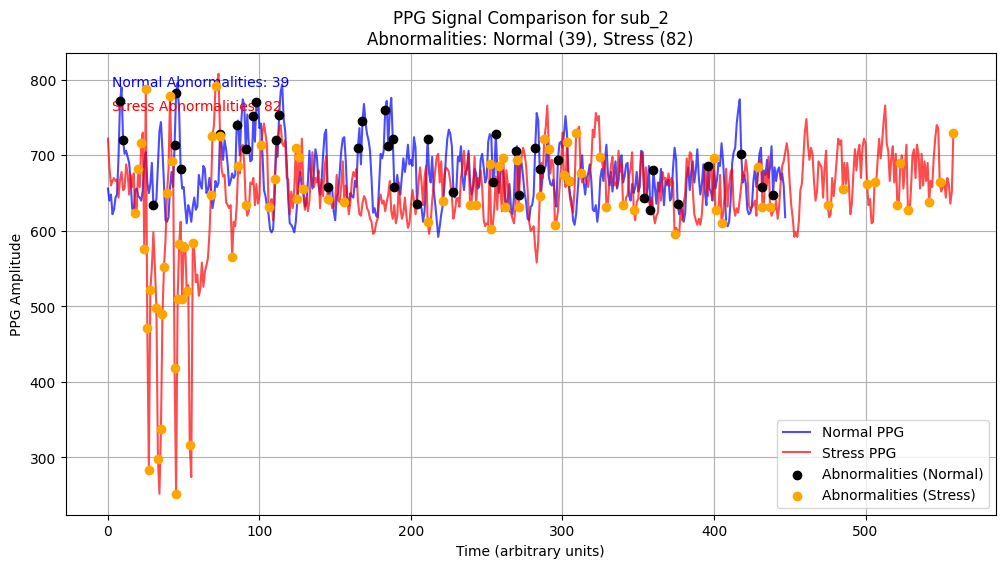

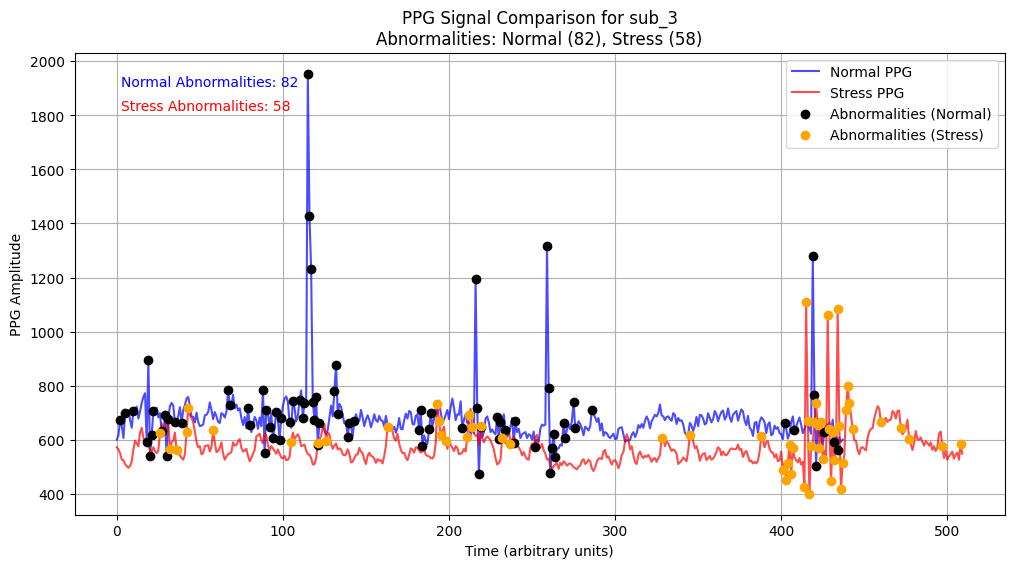

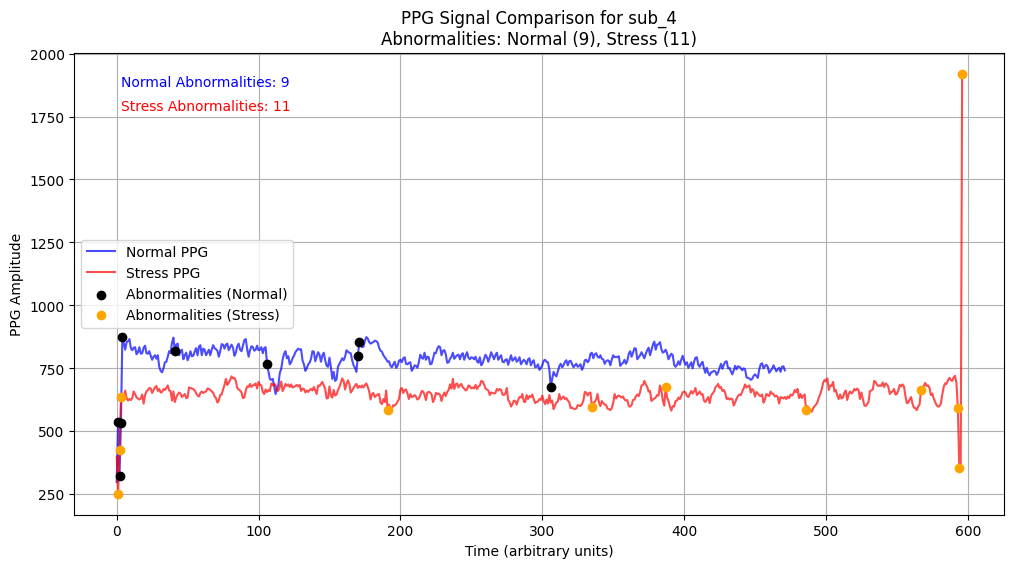

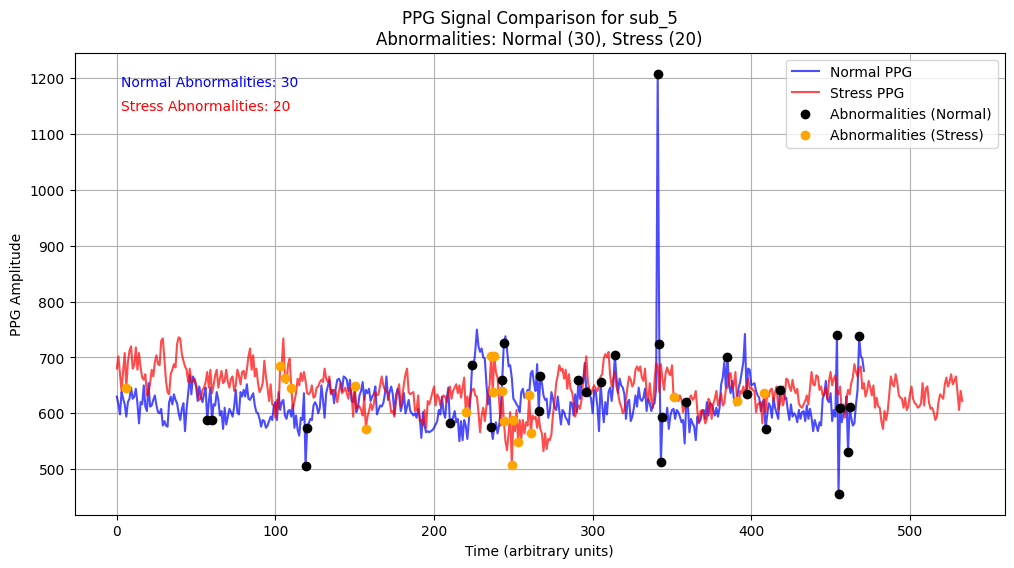

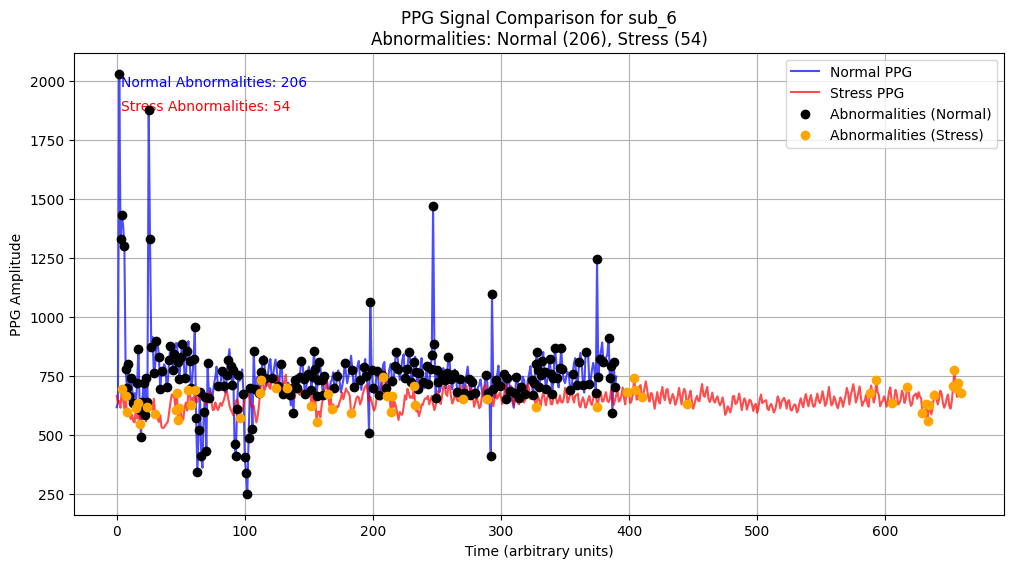

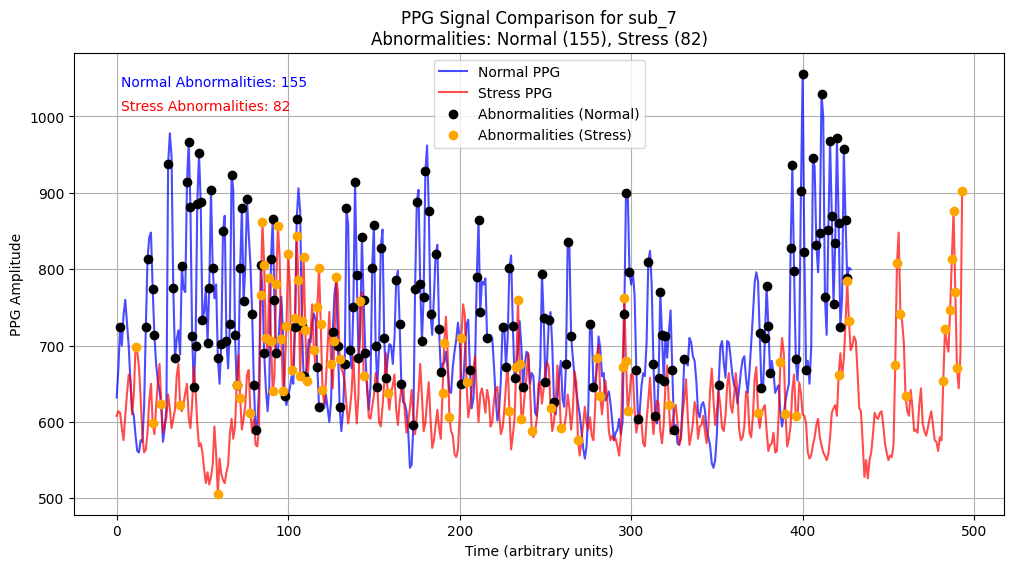

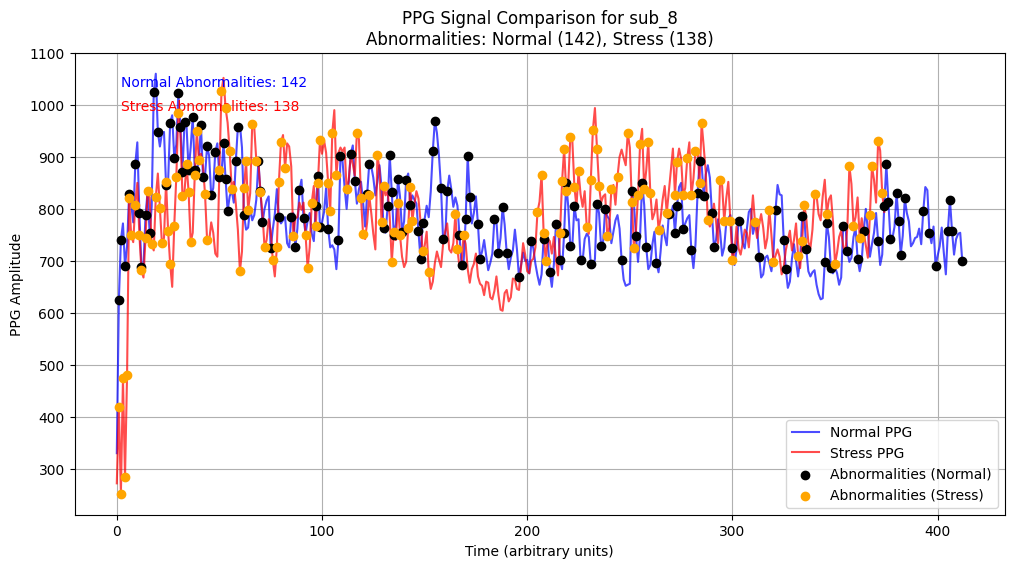

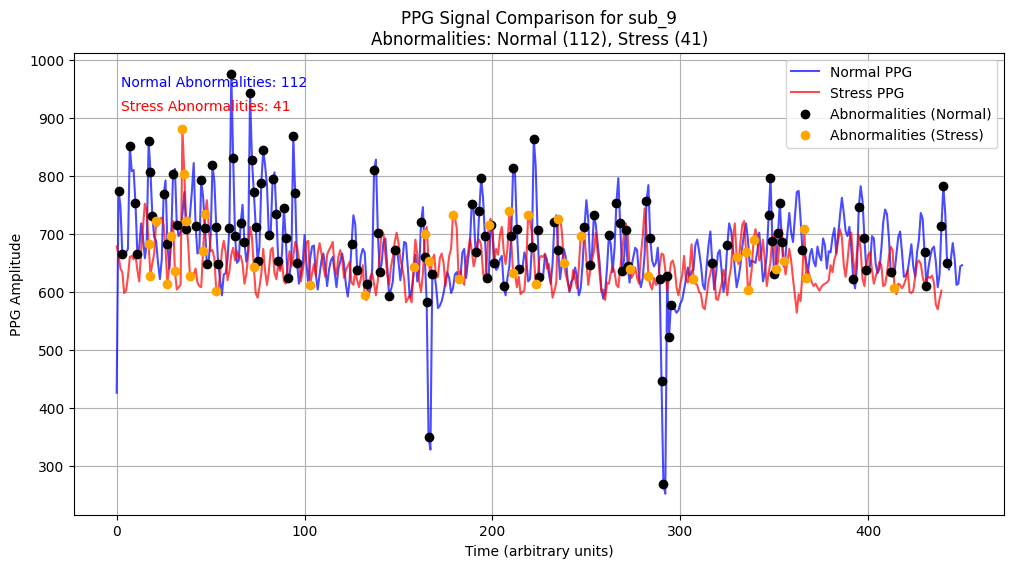

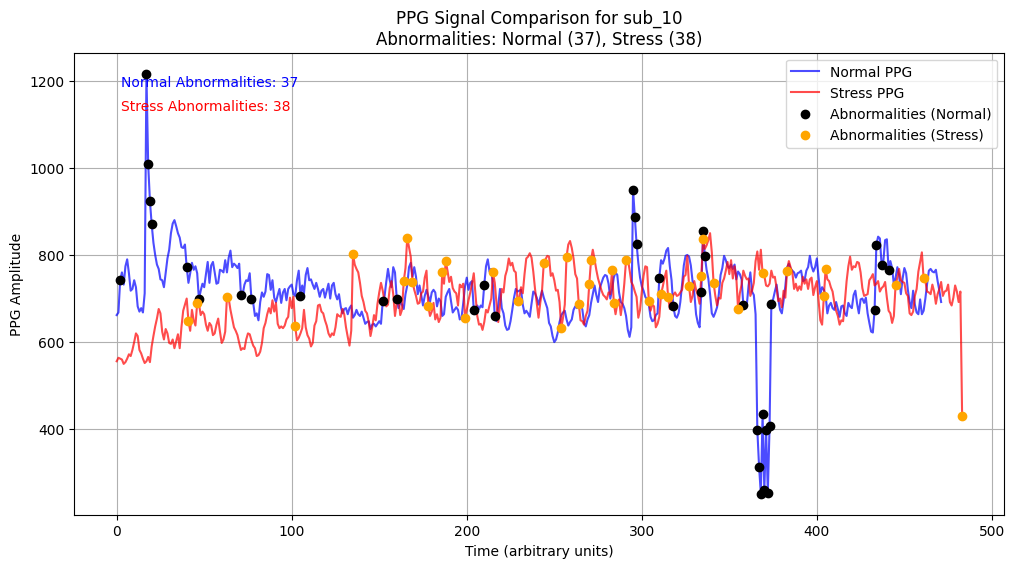

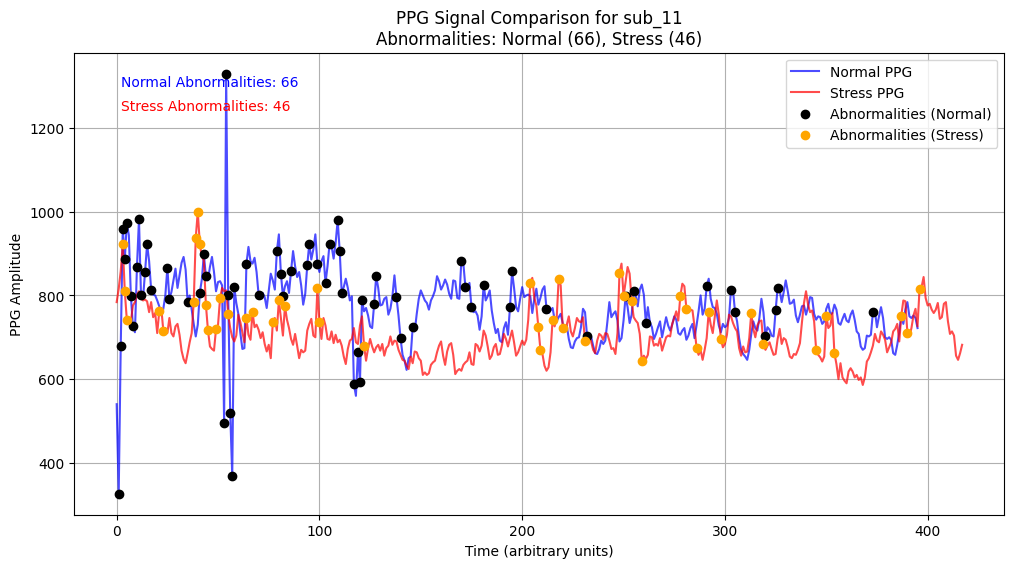

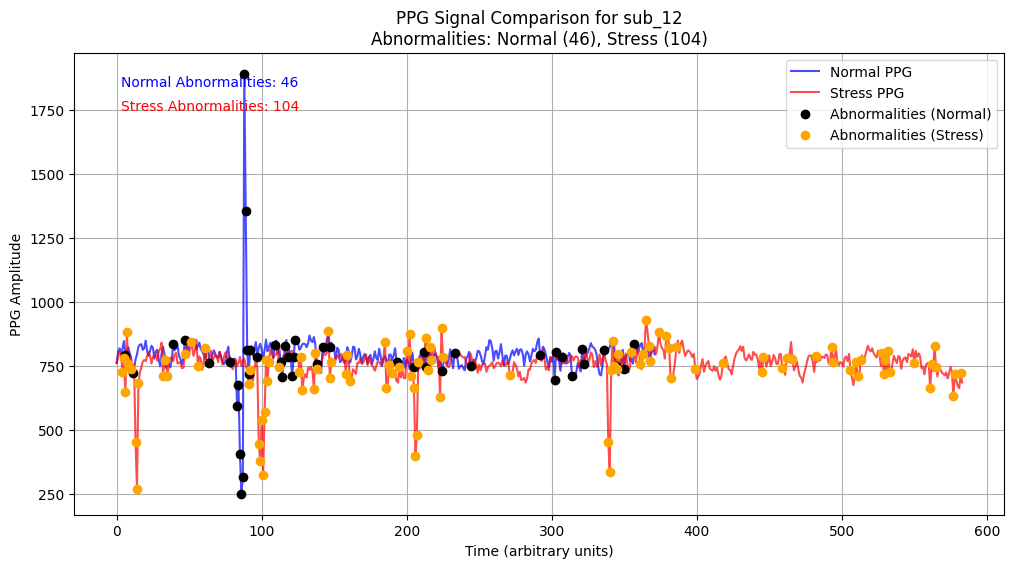

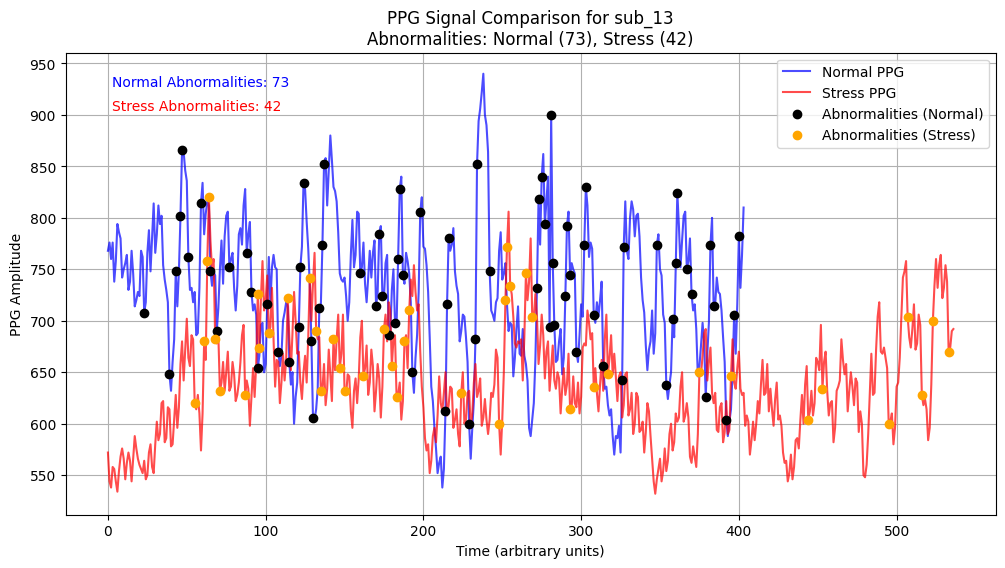

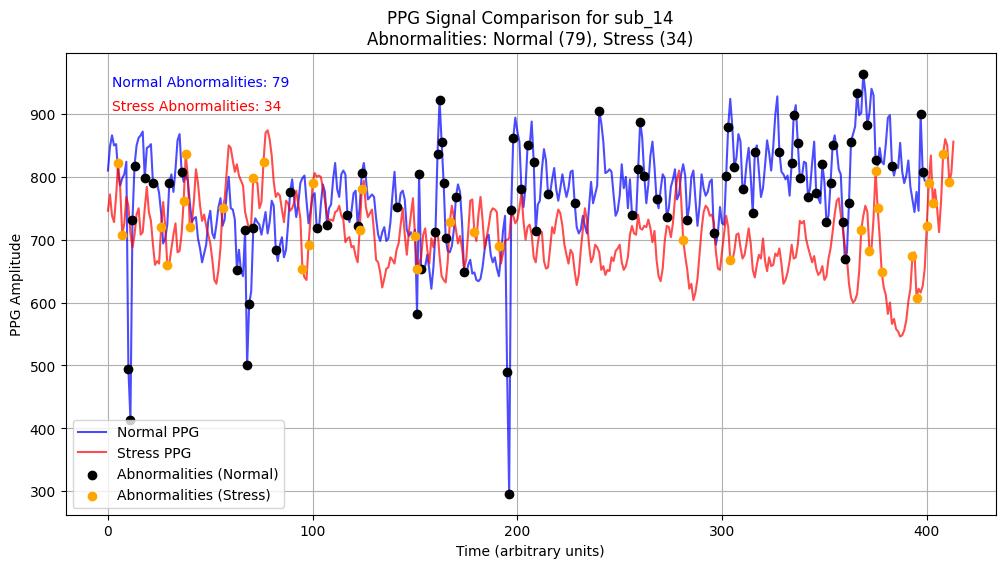

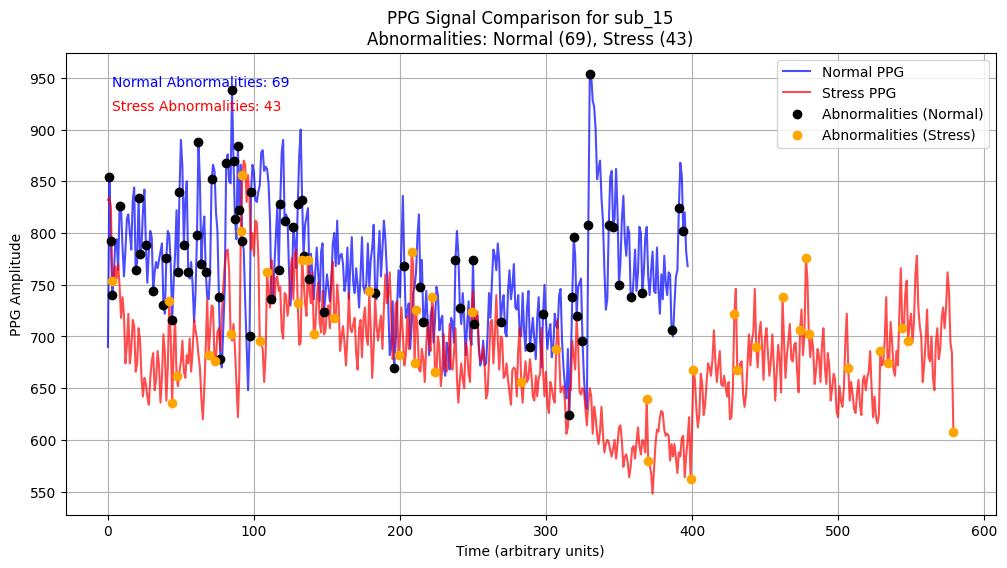

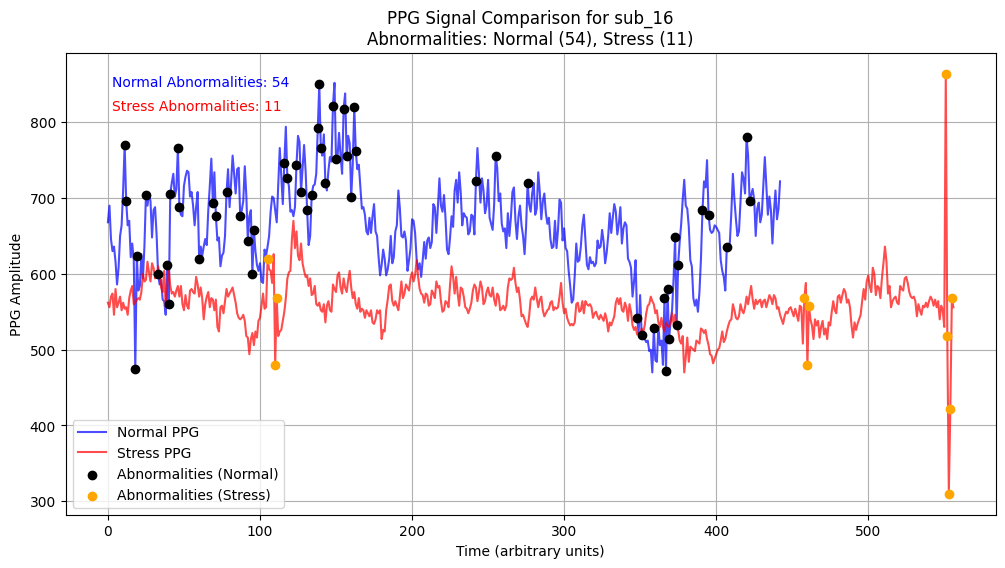

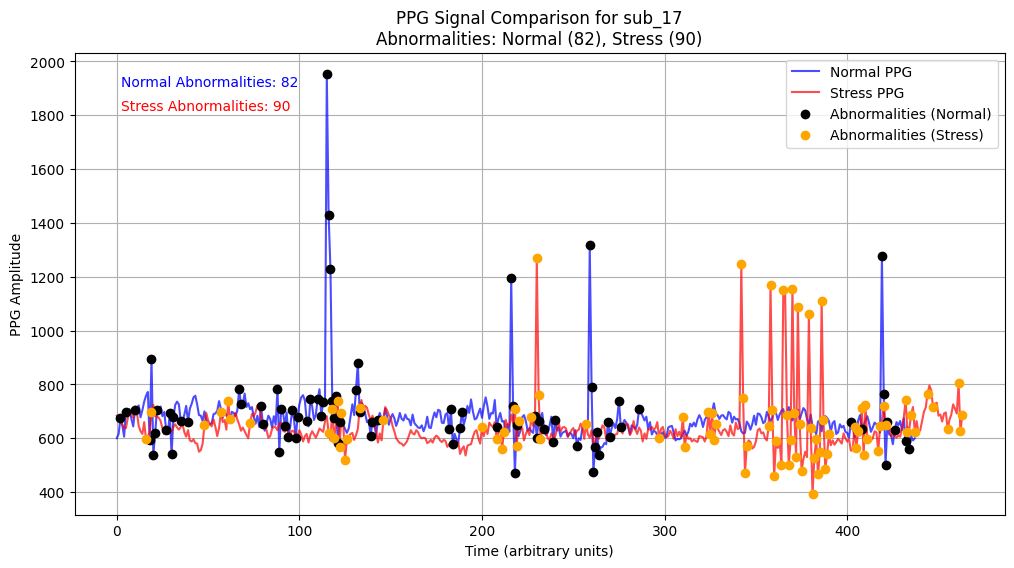

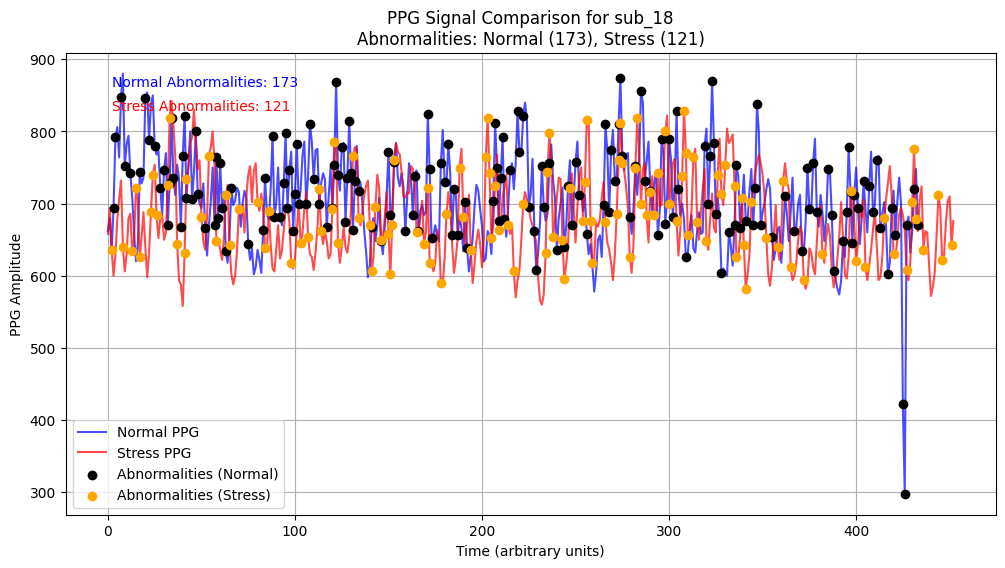

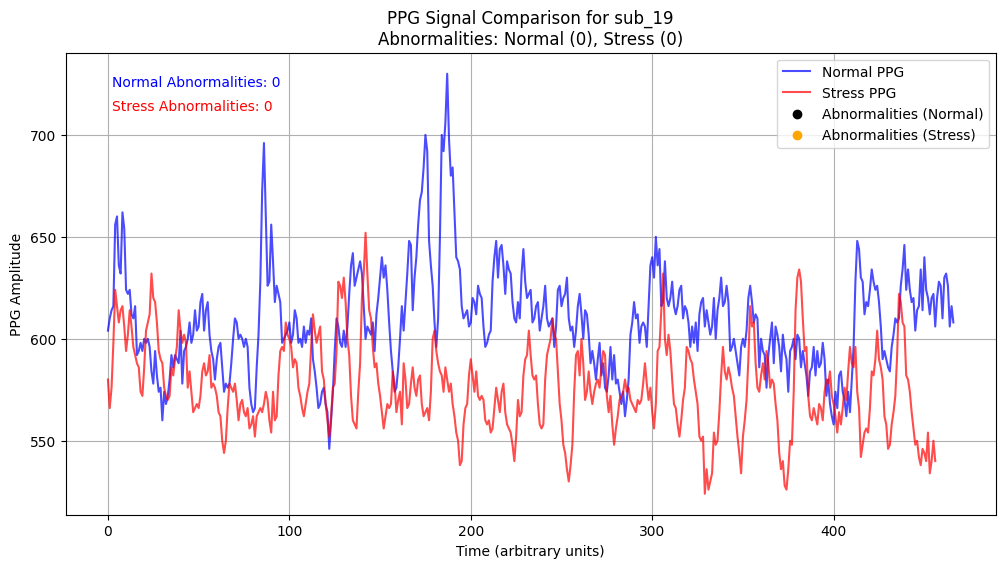

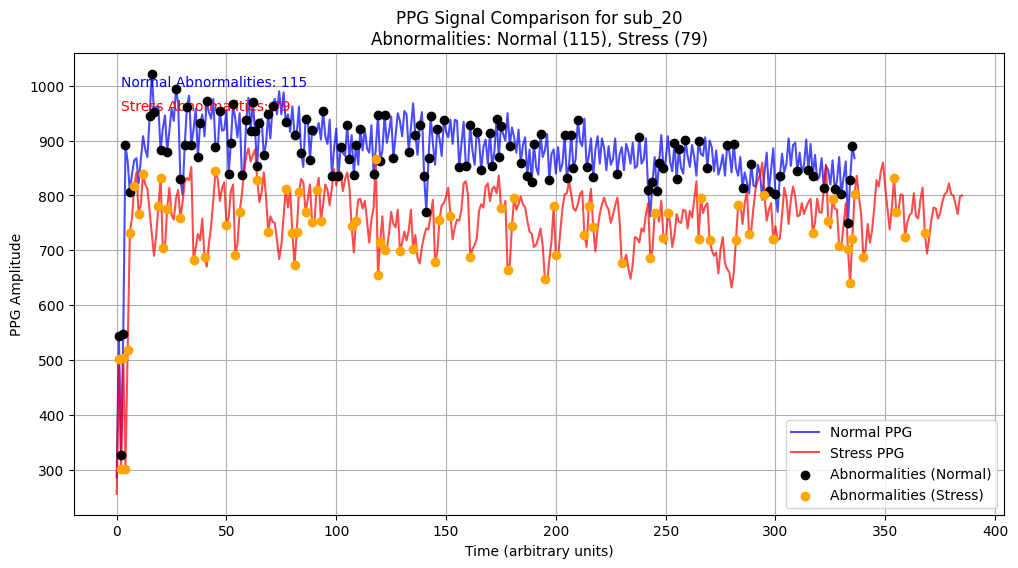

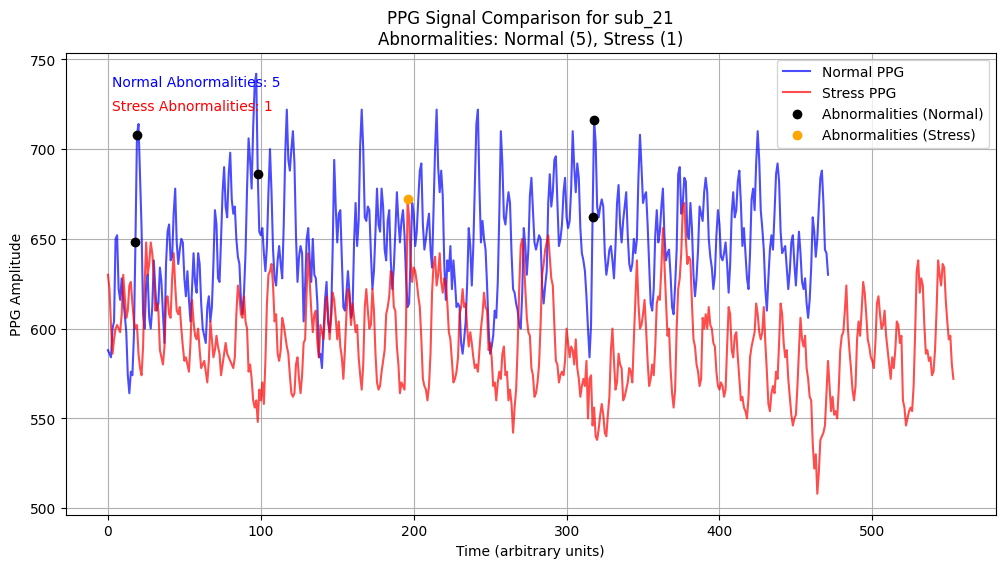

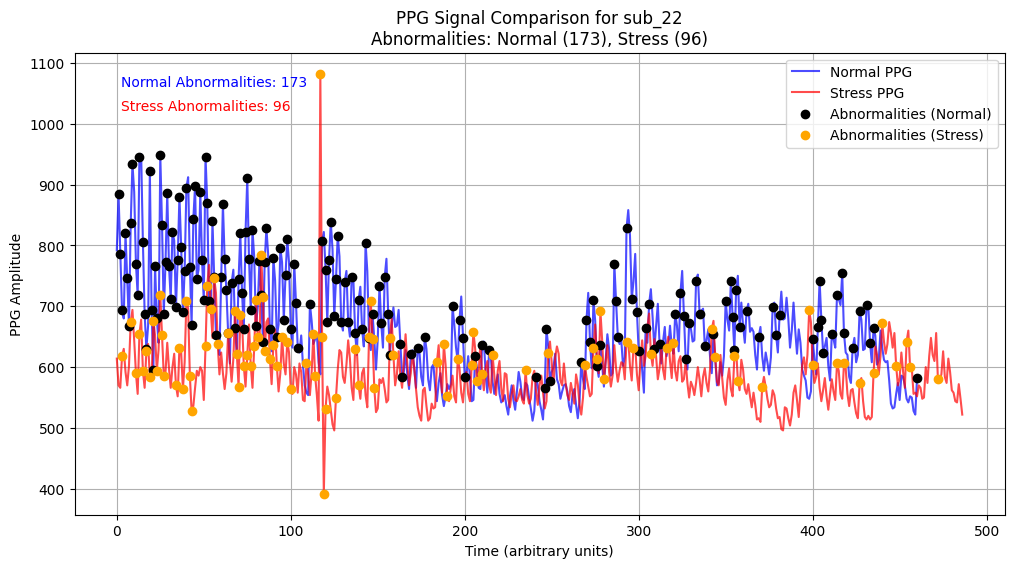

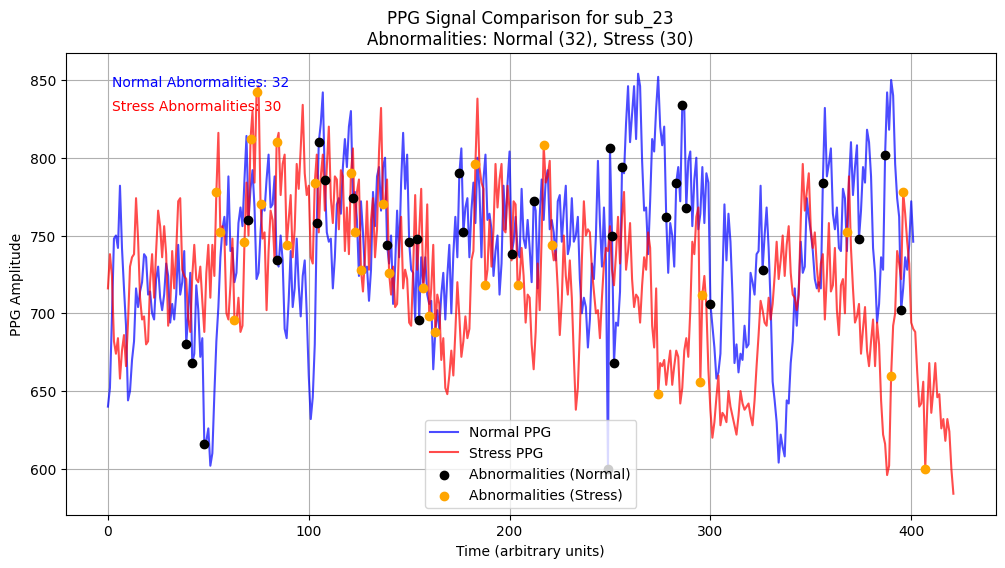

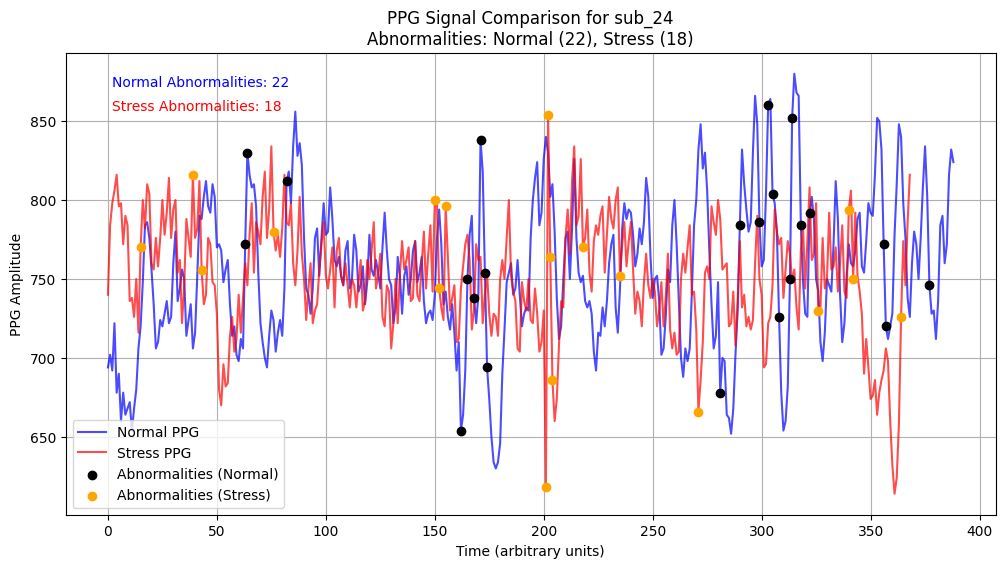

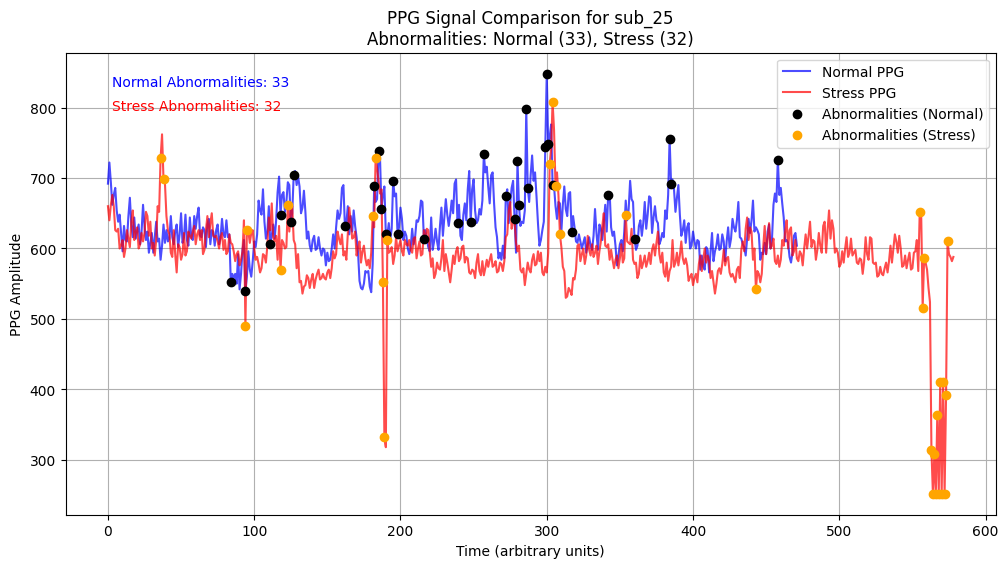

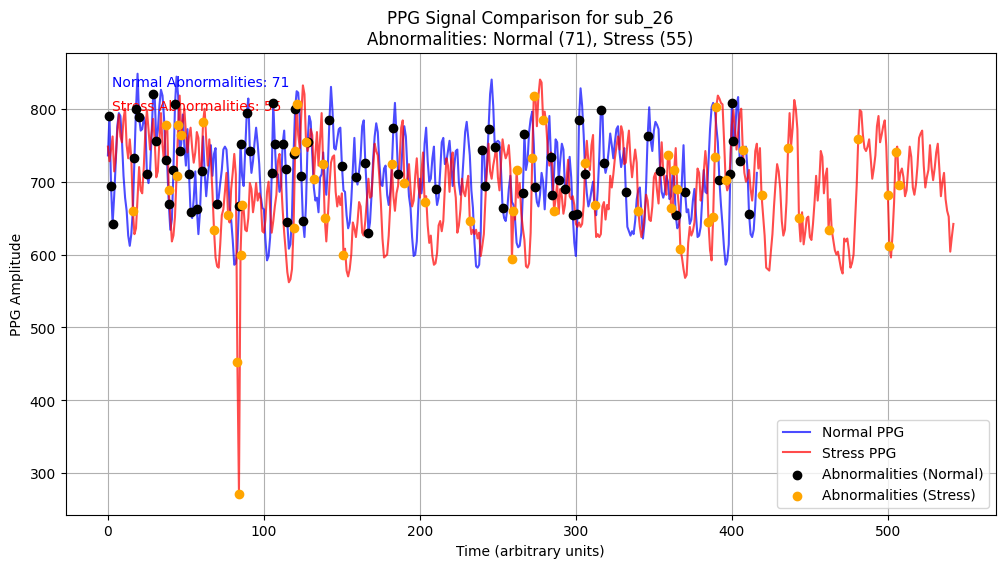

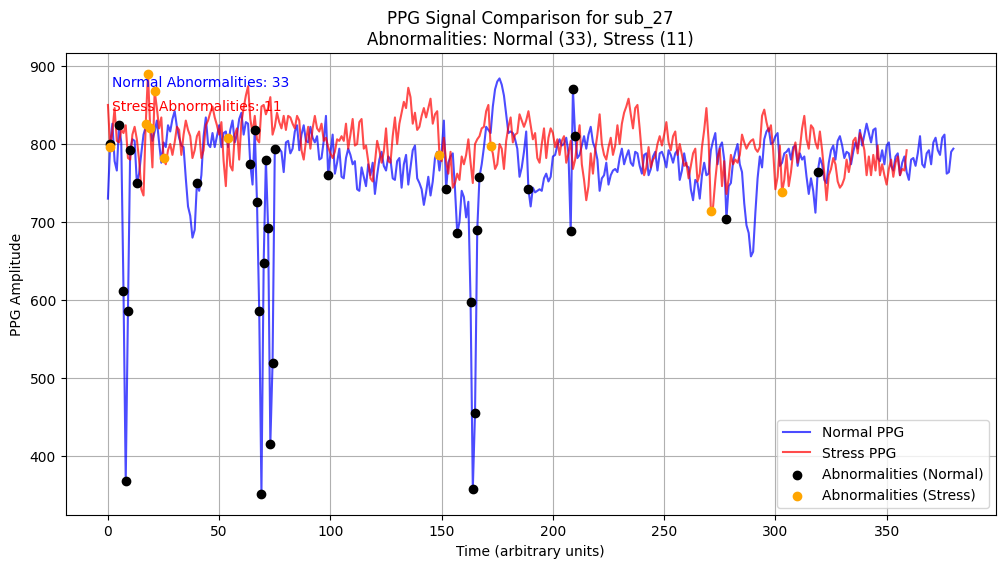

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Reading the CSV files
data_normal = pd.read_csv('data_normal.csv')
data_stress = pd.read_csv('data_stress.csv')

# Get all unique subject IDs
subjects = data_normal['subject ID'].unique()

# Function to detect abnormalities (e.g., sudden spikes or drops)
def detect_abnormalities(signal, threshold=50):
    """Detects abnormalities where the signal changes abruptly by a certain threshold."""
    abnormalities = []
    for i in range(1, len(signal)):
        if abs(signal[i] - signal[i - 1]) > threshold:
            abnormalities.append(i)
    return abnormalities

# Loop through each subject and plot the PPG signals with abnormalities marked
for subject in subjects:
    # Extract PPG data for the current subject from both datasets
    ppg_normal = data_normal[data_normal['subject ID'] == subject].iloc[:, 2:].dropna(axis=1).values.flatten()
    ppg_stress = data_stress[data_stress['subject ID'] == subject].iloc[:, 2:].dropna(axis=1).values.flatten()
    
    # Create a time axis for both signals
    time_normal = range(len(ppg_normal))
    time_stress = range(len(ppg_stress))
    
    # Detect abnormalities in the signals
    abnormalities_normal = detect_abnormalities(ppg_normal)
    abnormalities_stress = detect_abnormalities(ppg_stress)
    
    # Count the number of abnormalities
    num_abnormalities_normal = len(abnormalities_normal)
    num_abnormalities_stress = len(abnormalities_stress)
    
    # Plot the signals
    plt.figure(figsize=(12, 6))
    plt.plot(time_normal, ppg_normal, label='Normal PPG', color='blue', alpha=0.7)
    plt.plot(time_stress, ppg_stress, label='Stress PPG', color='red', alpha=0.7)
    
    # Mark abnormalities
    plt.scatter([time_normal[i] for i in abnormalities_normal], 
                [ppg_normal[i] for i in abnormalities_normal], 
                color='black', label='Abnormalities (Normal)', zorder=5)
    
    plt.scatter([time_stress[i] for i in abnormalities_stress], 
                [ppg_stress[i] for i in abnormalities_stress], 
                color='orange', label='Abnormalities (Stress)', zorder=5)
    
    # Add titles and labels
    plt.title(f'PPG Signal Comparison for {subject}\n'
              f'Abnormalities: Normal ({num_abnormalities_normal}), Stress ({num_abnormalities_stress})')
    plt.xlabel('Time (arbitrary units)')
    plt.ylabel('PPG Amplitude')
    plt.legend()
    plt.grid(True)
    
    # Add text annotations for the counts
    plt.text(0.05, 0.95, f'Normal Abnormalities: {num_abnormalities_normal}', 
             transform=plt.gca().transAxes, color='blue', fontsize=10, verticalalignment='top')
    plt.text(0.05, 0.90, f'Stress Abnormalities: {num_abnormalities_stress}', 
             transform=plt.gca().transAxes, color='red', fontsize=10, verticalalignment='top')
    
    # Display the plot
    plt.show()
